In [20]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")

This is the repository path:  c:\Users\Davide\Git\pypsa-africa
Had to go 0 folder(s) up.


# Input

In [33]:
# Load network
network_path = os.getcwd() + "/networks/base.nc"
n = pypsa.Network(network_path)
n

Index(['108549121-1', '191928541-1', '352048993-1', '179675620-1',
       '577279057-1', '379736263-1', '454552259-1', '382714837-1',
       '197840572-1', '664681172-1',
       ...
       '586589606-1', '197867601-1', '546620319-1', '454513837-1',
       '179675614-1', '664681178-1', '108562242-1', '701923227-1',
       '546132565-1', '452716570-1'],
      dtype='object', name='name', length=123)
Index(['108549121-1', '191928541-1', '352048993-1', '179675620-1',
       '577279057-1', '379736263-1', '454552259-1', '382714837-1',
       '197840572-1', '664681172-1',
       ...
       '586589606-1', '197867601-1', '546620319-1', '454513837-1',
       '179675614-1', '664681178-1', '108562242-1', '701923227-1',
       '546132565-1', '452716570-1'],
      dtype='object', name='name', length=123)
INFO:pypsa.io:Imported network base.nc has buses, lines


Network PyPSA-Eur

C:\ProgramData\Miniconda3\envs\toast\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

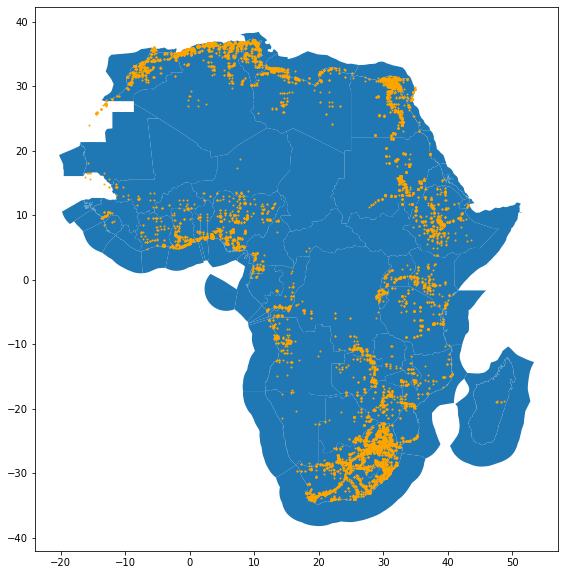

In [34]:
buses = n.buses
# Adding geometries from x and y coordinates
buses["geometry"] = gpd.points_from_xy(buses.lon, buses.lat)
buses = gpd.GeoDataFrame(buses, crs='epsg:4326')

continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)
buses.plot(ax=ax, color = "orange", markersize = 1)

In [38]:
buses[buses.country=="NA"]

,v_nom,symbol,under_construction,tag_substation,tag_area,lon,lat,country,substation_lv,x,...,substation_off,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,geometry
name,,,,,,,,,,,,,,,,,,,,,


# Output

<AxesSubplot:>

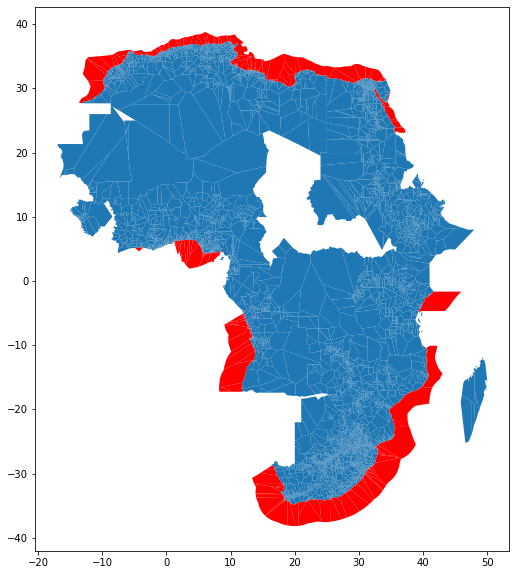

In [39]:
continent = gpd.read_file('resources/regions_onshore.geojson')
off_shore = gpd.read_file('resources/regions_offshore.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax, color="red")

In [46]:
c_b = n.buses.country == "NA"
n.buses.substation_off
b = (n.buses.substation_off & c_b)
b.sum()

0

In [47]:
c_b.sum()

0

In [48]:
n.buses.groupby("country").sum()

,v_nom,symbol,under_construction,tag_substation,tag_area,lon,lat,substation_lv,x,y,substation_off,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max
country,,,,,,,,,,,,,,
AO,67520.0,0,0,0,0,3524.651690,-2367.171958,235,3524.651690,-2367.171958,82,248.0,0.0,NaN
BF,3520.0,0,0,0,0,-27.257140,182.584186,16,-27.257140,182.584186,0,16.0,0.0,NaN
BI,2200.0,0,0,0,0,293.424712,-30.796384,10,293.424712,-30.796384,0,10.0,0.0,NaN
BJ,13400.0,0,0,0,0,128.608129,415.561202,54,128.608129,415.561202,8,58.0,0.0,NaN
BW,41520.0,0,0,0,0,4693.565321,-4170.533120,164,4693.565321,-4170.533120,12,180.0,0.0,NaN
CD,90400.0,0,0,0,0,8637.030249,-3299.526733,343,8637.030249,-3299.526733,62,368.0,0.0,NaN
CF,440.0,0,0,0,0,36.585955,9.295374,2,36.585955,9.295374,0,2.0,0.0,NaN
CG,20680.0,0,0,0,0,1309.641046,-365.189748,90,1309.641046,-365.189748,0,94.0,0.0,NaN
CI,25400.0,0,0,0,0,-533.515401,726.434308,102,-533.515401,726.434308,2,114.0,0.0,NaN


C:\ProgramData\Miniconda3\envs\toast\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
ERROR:shapely.geos:IllegalArgumentException: Points of LinearRing do not form a closed linestring


ValueError: No Shapely geometry can be created from null value

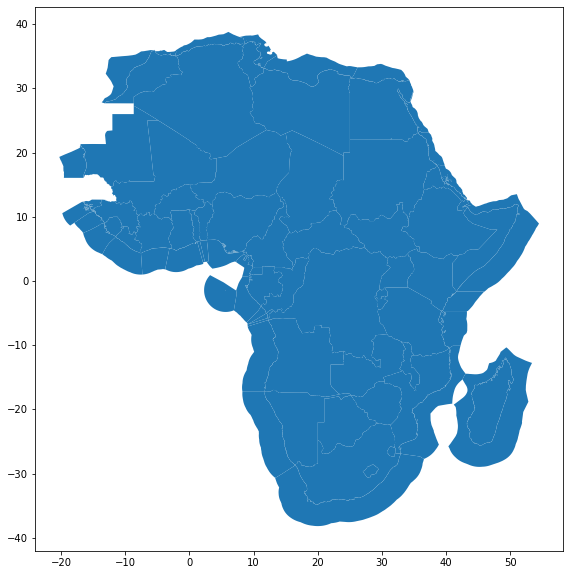

In [117]:
from shapely.geometry import LineString, Point

lines = n.lines[n.lines.country == "MA"].copy()
# lines = n.lines.copy()
lines["geometry"] = [LineString([Point(x.bus0_lon, x.bus0_lat), Point(x.bus1_lon, x.bus1_lat)]) for index, x in lines.iterrows() 
    if (x.bus0_lat is not None) and (x.bus0_lon is not None) and (x.bus1_lat is not None) and (x.bus1_lon is not None)]
lines = gpd.GeoDataFrame(geometry=lines.geometry, crs='epsg:4326')

continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)
c_code = "CD"
# lines[lines.country==c_code].plot(ax=ax, color="yellow")
# buses[buses.country==c_code].plot(ax=ax, color = "orange", markersize = 1)
lines.plot(ax=ax, color="yellow")
buses.plot(ax=ax, color = "orange", markersize = 1)

In [69]:
lines.country.unique()

array(['ZM', 'NG', 'UG', 'BF', 'ML', 'SZ', 'LS', 'ZA', 'MA', 'MW', 'GN',
       'GQ', 'SS', 'CI', 'NE', 'BW', 'BJ', 'MG', 'DJ', 'GA', 'ER', 'KE',
       'SL', 'BI', 'LY', 'ZW', 'TG', 'ET', 'CF', 'EG', 'RW', 'TZ', 'CM',
       'GH', 'CG', 'MR', 'MZ', 'AO', 'DZ', 'CD', 'SD', 'TN'], dtype=object)